In [69]:
import sklearn
import statsmodels
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import warnings



In [70]:
warnings.simplefilter(action='ignore', category=FutureWarning)

In [71]:

df = pd.read_csv('Transjakarta.csv', index_col =0)
df.head()

,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
transID,,,,,,,,,,,,,,,,,,,,,
EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,Pal Putih,...,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0
LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,Kemenkes 2,...,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0
DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,Gg. Kunir II,...,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0
JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,Taman Elok 1,...,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0
VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,Sunter Boulevard Barat,...,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0


DATA CLEANING

1. MEMERIKSA APAKAH ADA MISSING VALUE

In [72]:

missing_values = df.isnull().sum()
print("Missing values dari setiap column:\n", missing_values)



Missing values dari setiap column:
 payCardID              0
payCardBank            0
payCardName            0
payCardSex             0
payCardBirthDate       0
corridorID          1257
corridorName        1930
direction              0
tapInStops          1213
tapInStopsName         0
tapInStopsLat          0
tapInStopsLon          0
stopStartSeq           0
tapInTime              0
tapOutStops         2289
tapOutStopsName     1344
tapOutStopsLat      1344
tapOutStopsLon      1344
stopEndSeq          1344
tapOutTime          1344
payAmount           1007
dtype: int64


2. DROP baris dengan nilai yang hilang di kolom penting
3. Imput  nilai yang hilang di 'corridorID' dan 'corridorName' menggunakan mode
4. Hitung nilai yang hilang di 'tapInStops' menggunakan mode
5. memastikan apakah sudah tidak ada missing values

In [73]:
#2
penting = ['tapOutStops', 'tapOutStopsName', 'tapOutStopsLat', 'tapOutStopsLon', 'stopEndSeq', 'tapOutTime', 'payAmount']
data_cleaned = df.dropna(subset=penting)
#3
corridor_id_mode = data_cleaned['corridorID'].mode()[0]
corridor_name_mode = data_cleaned['corridorName'].mode()[0]

data_cleaned.loc[data_cleaned['corridorID'].isnull(), 'corridorID'] = corridor_id_mode
data_cleaned.loc[data_cleaned['corridorName'].isnull(), 'corridorName'] = corridor_name_mode
#4
tapin_stops_mode = data_cleaned['tapInStops'].mode()[0]
data_cleaned['tapInStops'] = data_cleaned.loc[data_cleaned['tapInStops'].isnull(), 'tapInStops'] = tapin_stops_mode
#5
missing_values_after_imputation = data_cleaned.isnull().sum()
print("Missing values after imputation:\n", missing_values_after_imputation)

Missing values after imputation:
 payCardID           0
payCardBank         0
payCardName         0
payCardSex          0
payCardBirthDate    0
corridorID          0
corridorName        0
direction           0
tapInStops          0
tapInStopsName      0
tapInStopsLat       0
tapInStopsLon       0
stopStartSeq        0
tapInTime           0
tapOutStops         0
tapOutStopsName     0
tapOutStopsLat      0
tapOutStopsLon      0
stopEndSeq          0
tapOutTime          0
payAmount           0
dtype: int64


C:\Users\nick4\AppData\Local\Temp\ipykernel_35604\3519315522.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['tapInStops'] = data_cleaned.loc[data_cleaned['tapInStops'].isnull(), 'tapInStops'] = tapin_stops_mode


DATA DUPLIKAT


In [74]:
# Check for duplicates
duplicates = data_cleaned.duplicated().sum()
print("Number of duplicate rows: ", duplicates)



Number of duplicate rows:  0


seperti yang di tamplkan tidak ada data duplikat pada data clean( data yang penting saja)

OUTLIER 

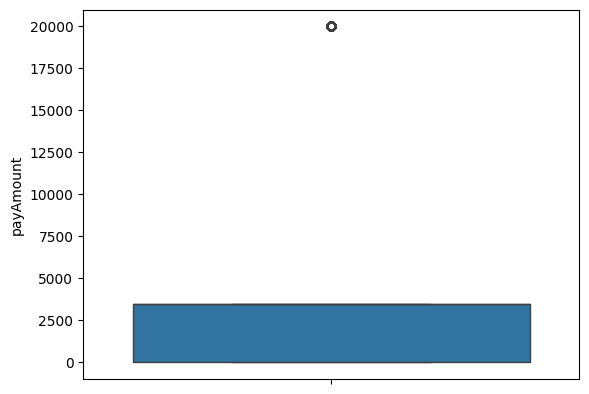

In [75]:
sns.boxplot(df['payAmount'])
plt.show()

dilihat karena ada nya oulier maka saya membuat data baru dengan memisahkan data yang tidak ada outliernya

Menangani outlier pada 'payamount'

In [76]:
# Detect outliers in the 'payAmount' column using IQR
Q1 = data_cleaned['payAmount'].quantile(0.25)
Q3 = data_cleaned['payAmount'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
data_cleaned = data_cleaned[(data_cleaned['payAmount'] >= lower_bound) & (data_cleaned['payAmount'] <= upper_bound)]

# Verify that outliers are removed
print("Number of rows after removing outliers: ", data_cleaned.shape[0])


Number of rows after removing outliers:  33007


menampilkan outlier

In [77]:
print("Outliers in 'payAmount':")
print(data_cleaned[['payAmount']])

print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")
print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")


Outliers in 'payAmount':
                payAmount
transID                  
EIIW227B8L34VB     3500.0
LGXO740D2N47GZ     3500.0
DJWR385V2U57TO     3500.0
JTUZ800U7C86EH     3500.0
VMLO535V7F95NJ     3500.0
...                   ...
ZXVG342K6T27GU        0.0
ZWEC949B8Q87QG     3500.0
YHHK837P6Y95GN     3500.0
RGVK175U2U98UV        0.0
FMZZ963S4B68ZP     3500.0

[33007 rows x 1 columns]
Q1: 0.0, Q3: 3500.0, IQR: 3500.0
Lower Bound: -5250.0, Upper Bound: 8750.0


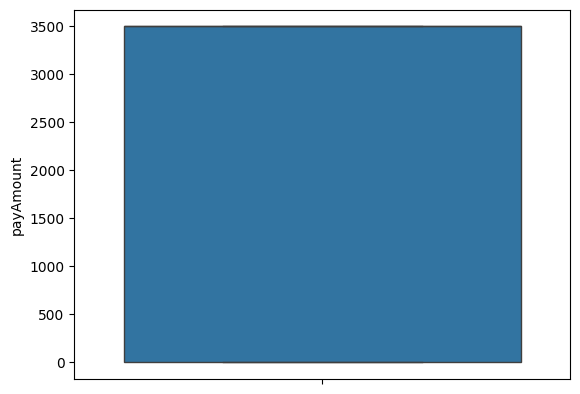

In [78]:
sns.boxplot(data_cleaned['payAmount'])
plt.show()

VISUALISASI DATA DAN ANALISIS

disini saya akan membuat sebuah analisa kecil dari beberapa data 

1. DISTRIBUSI pengguna berdasarkan usia

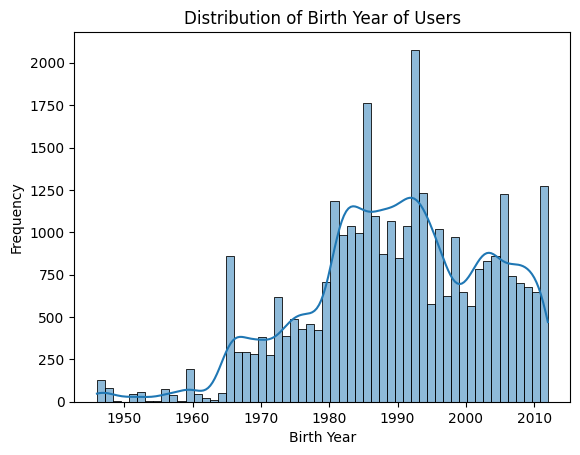

In [79]:

# Plotting the distribution of birth year of users
sns.histplot(data_cleaned['payCardBirthDate'], kde=True)
plt.title('Distribution of Birth Year of Users')
plt.xlabel('Birth Year')
plt.ylabel('Frequency')
plt.show()

2. Penggunaan kartu pembayaran berdasarkan bank

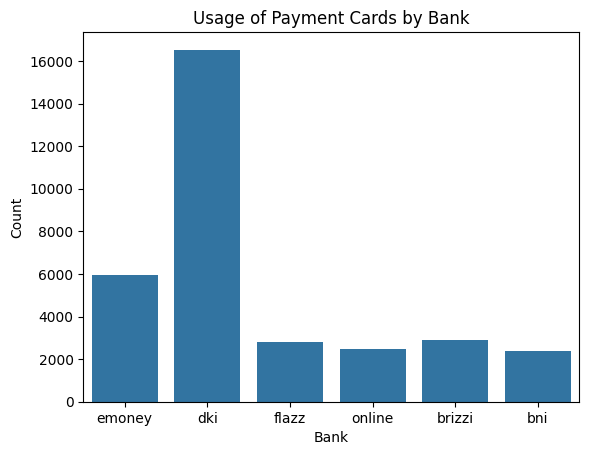

In [80]:
# Plotting the usage of payment cards by bank
sns.countplot(x='payCardBank', data=data_cleaned)
plt.title('Usage of Payment Cards by Bank')
plt.xlabel('Bank')
plt.ylabel('Count')
plt.show()

ANALISIS DAN VISUAL

1. EFISIENSI  RUTE DAN KORIDOR

Rekomendasi: Meninjau dan mengoptimalkan rute berdasarkan frekuensi penggunaan. Menambah armada pada rute yang populer dan mempertimbangkan perubahan rute pada yang kurang populer.

In [81]:
# Analyzing the most and least used corridors
corridor_usage = data_cleaned['corridorName'].value_counts()
corridor_usage.head()



corridorName
Cibubur - Balai Kota                       1675
Ciputat - CSW                               364
Harmoni - Jakarta International Stadium     325
Pulo Gadung - Monas                         322
Kampung Rambutan - Pondok Gede              314
Name: count, dtype: int64

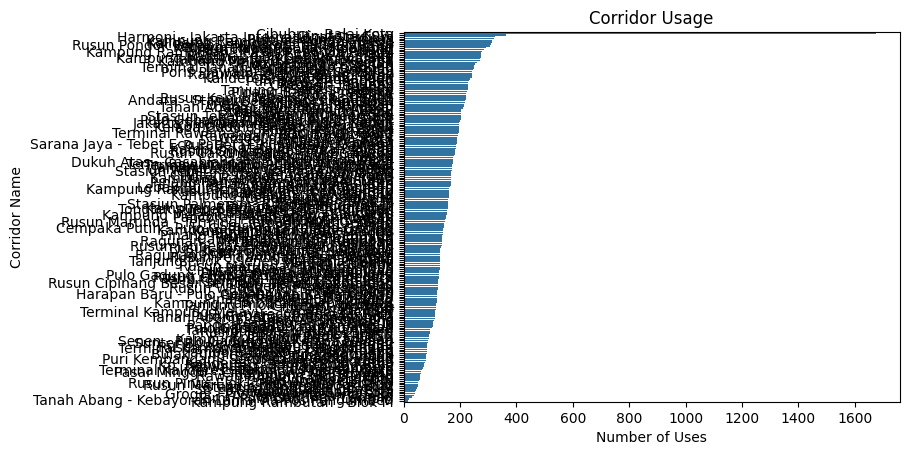

In [82]:
sns.barplot(y=corridor_usage.index, x=corridor_usage.values, orient='h')
plt.title('Corridor Usage')
plt.xlabel('Number of Uses')
plt.ylabel('Corridor Name')
plt.show()

2. WAKTU TEMPUH

Rekomendasi: Menggunakan hasil analisis ini untuk meningkatkan efisiensi jadwal dan mengurangi waktu tempuh pada rute-rute yang sering mengalami keterlambatan

In [83]:
# Calculating
data_cleaned['tapInTime'] = pd.to_datetime(data_cleaned['tapInTime'])
data_cleaned['tapOutTime'] = pd.to_datetime(data_cleaned['tapOutTime'])
data_cleaned['travelTime'] = (data_cleaned['tapOutTime'] - data_cleaned['tapInTime']).dt.total_seconds() / 60

# Analyzing 
average_travel_time = data_cleaned.groupby('corridorName')['travelTime'].mean().sort_values()
print("Average Travel Time per Corridor:\n", average_travel_time)


Average Travel Time per Corridor:
 corridorName
Pulo Gebang - Pulo Gadung 2               60.772673
Pondok Kelapa - BKN                       61.565926
Stasiun Manggarai - Blok M                61.571569
St. LRT Pegangsaan Dua - JIS              61.897464
Pulo Gadung 2 - Dukuh Atas 2              63.409901
                                            ...    
Puri Kembangan - Sentraland Cengkareng    80.001042
Rawamangun - Klender                      80.745294
Rusun Pinus Elok - Rusun Pulo Gebang      80.918269
Stasiun Palmerah - Tosari                 81.888345
Kampung Rambutan - Blok M                 84.985294
Name: travelTime, Length: 202, dtype: float64


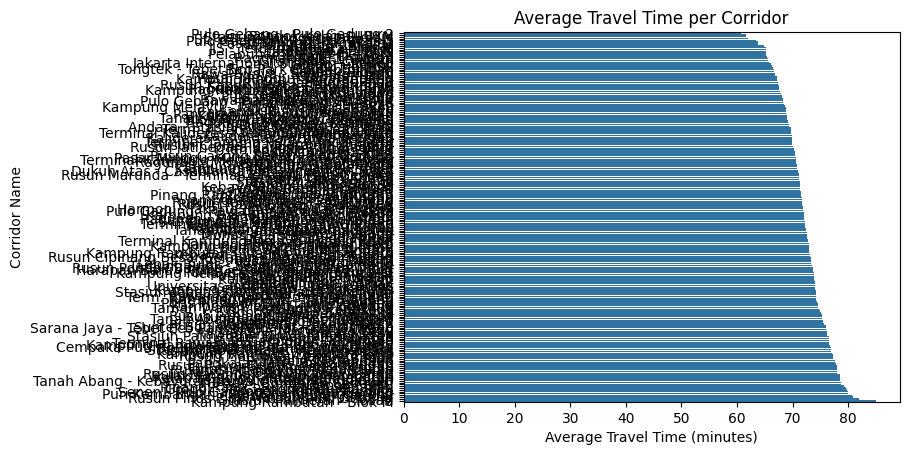

In [84]:
sns.barplot(y=average_travel_time.index, x=average_travel_time.values, orient='h')
plt.title('Average Travel Time per Corridor')
plt.xlabel('Average Travel Time (minutes)')
plt.ylabel('Corridor Name')
plt.show()

3. PROFIL PENGGUNA

Rekomendasi: Mengembangkan strategi pemasaran yang lebih tepat sasaran dan menyesuaikan layanan untuk kelompok demografi utama

In [85]:
# Analyzing the distribution of users by birth year
user_birth_year_distribution = data_cleaned['payCardBirthDate'].value_counts()
print("User Birth Year Distribution:\n", user_birth_year_distribution)

User Birth Year Distribution:
 payCardBirthDate
1994    1231
1981    1186
1992    1185
1987    1096
1989    1068
        ... 
1949       6
1955       5
1954       4
1958       4
1950       1
Name: count, Length: 67, dtype: int64


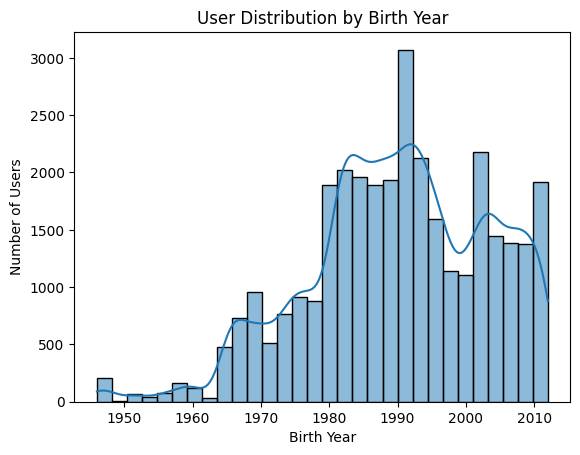

In [86]:
sns.histplot(data_cleaned['payCardBirthDate'], bins=30, kde=True)
plt.title('User Distribution by Birth Year')
plt.xlabel('Birth Year')
plt.ylabel('Number of Users')
plt.show()

4. PERILAKU TAP IN DAN TAP OUT

Rekomendasi: Menyediakan armada tambahan selama jam sibuk dan di halte-halte yang sering mengalami kepadatan. Menyesuaikan frekuensi bus berdasarkan pola penggunaan.

In [87]:
tapin_stops_usage = data_cleaned['tapInStopsName'].value_counts()
print("Tap-in Stops Usage:\n", tapin_stops_usage.head(10))

Tap-in Stops Usage:
 tapInStopsName
Penjaringan          224
Garuda Taman Mini    198
BKN                  158
BNN LRT              148
Pejaten              143
Penggilingan         124
Seskoal              121
Rusun Kapuk Muara    119
Petojo               108
Cawang Otista        106
Name: count, dtype: int64


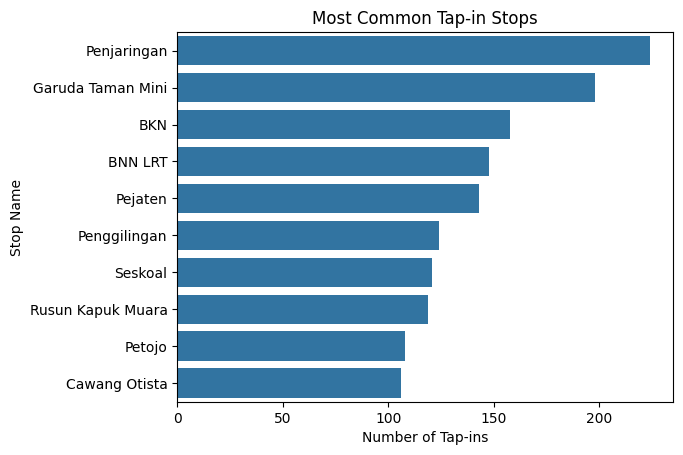

In [88]:
sns.barplot(y=tapin_stops_usage.head(10).index, x=tapin_stops_usage.head(10).values, orient='h')
plt.title('Most Common Tap-in Stops')
plt.xlabel('Number of Tap-ins')
plt.ylabel('Stop Name')
plt.show()

1. Menghitung waktu rata rata perkoridor
2. mengambil top 10

In [89]:
average_travel_time = data_cleaned.groupby('corridorName')['travelTime'].mean().sort_values(ascending=False)
top_10_corridors_travel_time = average_travel_time.head(10)
print(top_10_corridors_travel_time)

corridorName
Kampung Rambutan - Blok M                 84.985294
Stasiun Palmerah - Tosari                 81.888345
Rusun Pinus Elok - Rusun Pulo Gebang      80.918269
Rawamangun - Klender                      80.745294
Puri Kembangan - Sentraland Cengkareng    80.001042
Senen - Pulo Gadung via Kelapa Gading     79.884470
Grogol - Tubagus Angke                    79.714198
Grogol - Pos Pengumben via Slipi          79.582906
Pinang Ranti - Bundaran Senayan           79.297482
Depok - BKN                               78.775986
Name: travelTime, dtype: float64


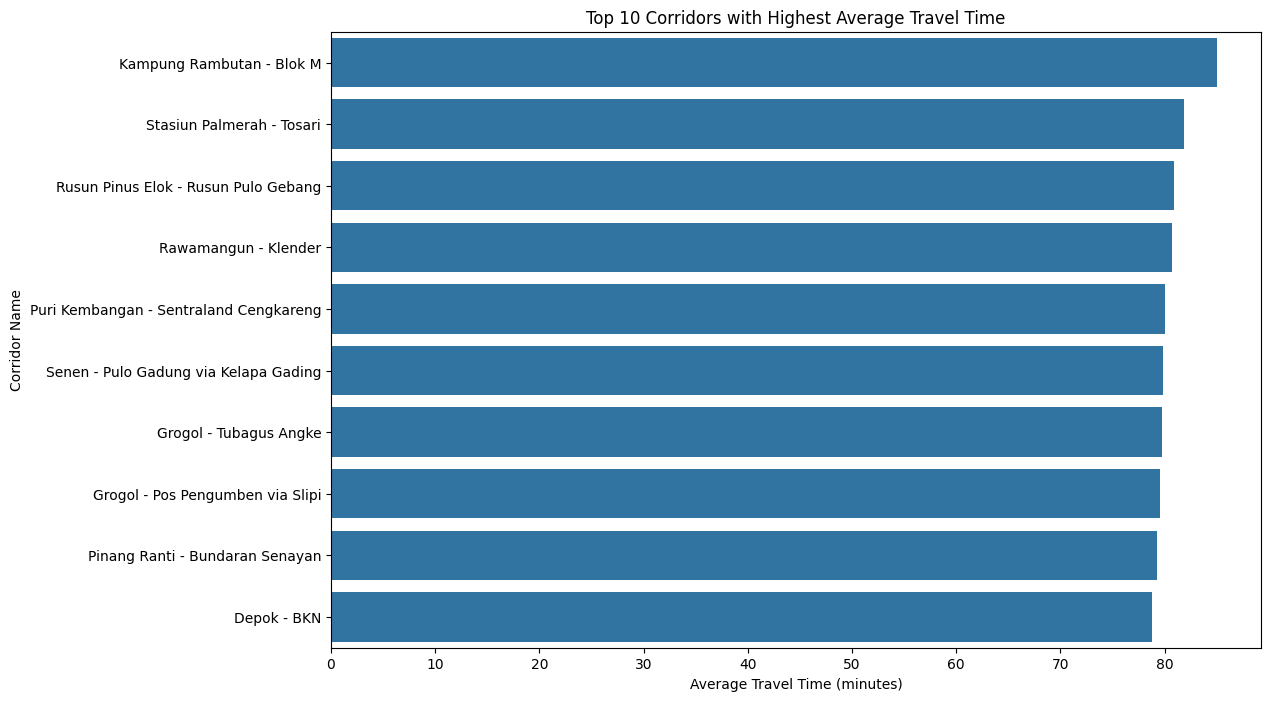

In [90]:
plt.figure(figsize=(12, 8))
sns.barplot(y=top_10_corridors_travel_time.index, x=top_10_corridors_travel_time.values, orient='h')
plt.title('Top 10 Corridors with Highest Average Travel Time')
plt.xlabel('Average Travel Time (minutes)')
plt.ylabel('Corridor Name')
plt.show()

10 pembayarann tertinggi

dilihat hasil pembayaran semua di angka 3500

In [91]:

top_10_payments = data_cleaned.nlargest(10, 'payAmount')[['corridorName', 'payAmount', 'travelTime']]
print(top_10_payments)

                                            corridorName  payAmount  \
transID                                                               
EIIW227B8L34VB                     Matraman Baru - Ancol     3500.0   
LGXO740D2N47GZ  Stasiun Tebet - Karet via Patra Kuningan     3500.0   
DJWR385V2U57TO                        Pantai Maju - Kota     3500.0   
JTUZ800U7C86EH       Pulo Gebang - Pulo Gadung 2 via PIK     3500.0   
VMLO535V7F95NJ                     Tanjung Priok - Pluit     3500.0   
ERXO372B2H63RB                           Rempoa - Blok M     3500.0   
CLWK627W2M22WO   Kampung Melayu - Tanah Abang via Cikini     3500.0   
OPLW560U3S06UG                          PGC 2 - Grogol 2     3500.0   
XESX233R4U46DN                    Pulo Gadung 2 - Tosari     3500.0   
KLUN542I2F21PI                Ciputat - Kampung Rambutan     3500.0   

                travelTime  
transID                     
EIIW227B8L34VB   39.150000  
LGXO740D2N47GZ   57.283333  
DJWR385V2U57TO   51.816667  
JT

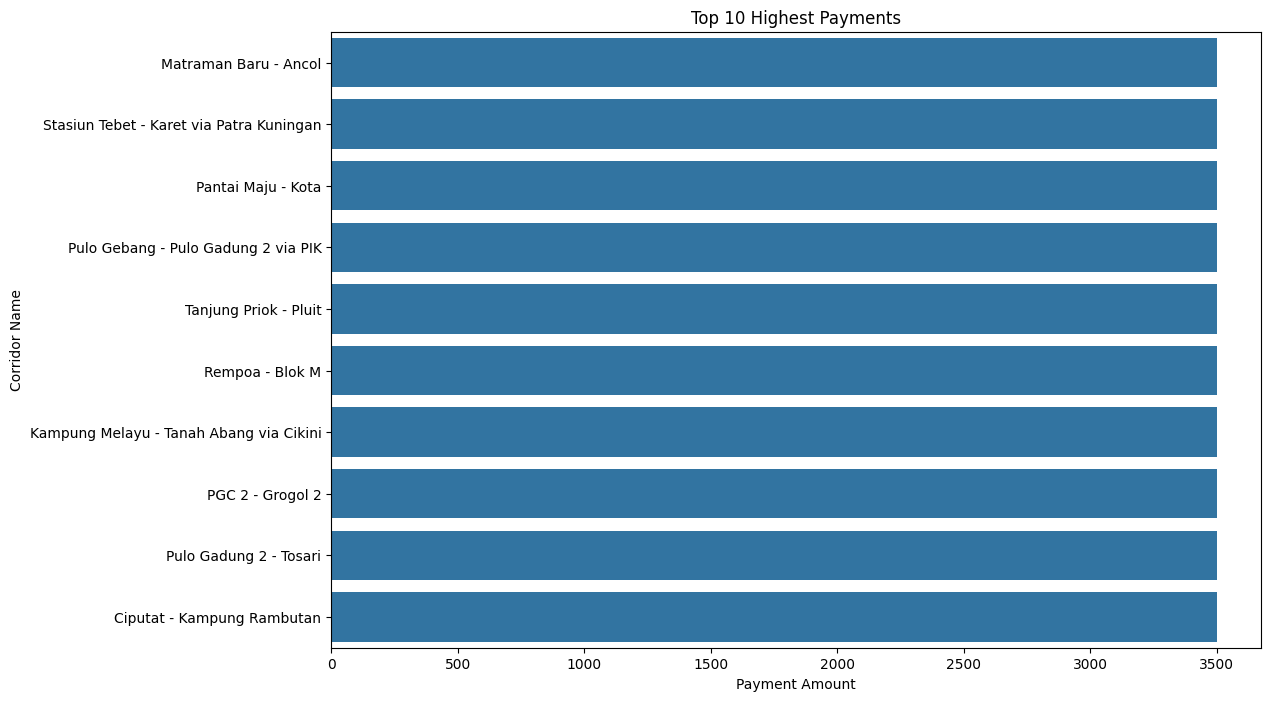

In [92]:
plt.figure(figsize=(12, 8))
sns.barplot(x=top_10_payments['payAmount'], y=top_10_payments['corridorName'], orient='h')
plt.title('Top 10 Highest Payments')
plt.xlabel('Payment Amount')
plt.ylabel('Corridor Name')
plt.show()

Waktu tempuh terpendek

In [93]:
shortest_travel_times = data_cleaned.nsmallest(10, 'travelTime')[['corridorName', 'travelTime', 'payAmount']]
print(shortest_travel_times)

                                       corridorName  travelTime  payAmount
transID                                                                   
OWOP107B1O64EM       Kampung Rambutan - Pondok Gede   15.000000        0.0
ZLNS504G2J07CY  Kalideres - Bundaran HI via Veteran   15.116667     3500.0
KFDS802H5U77DA                Tanjung Priok - PGC 2   15.116667     3500.0
CICL268Z1O81LI                Matraman Baru - Ancol   15.133333     3500.0
YNRS164Z7G54WM               Puri Beta - Dukuh Atas   15.133333     3500.0
SXNT314D0V38JZ       Rusun Sindang Koja - Kp. Sawah   15.166667        0.0
UELC054C4A36LL                       Senen - Blok M   15.200000     3500.0
TRZO272Z0V24YJ                  Cililitan - Dwikora   15.216667        0.0
QUNJ066L9Q65MY            Rusun Pesakih - Kalideres   15.216667        0.0
LQTX651C0U14PT                      Meruya - Blok M   15.233333     3500.0


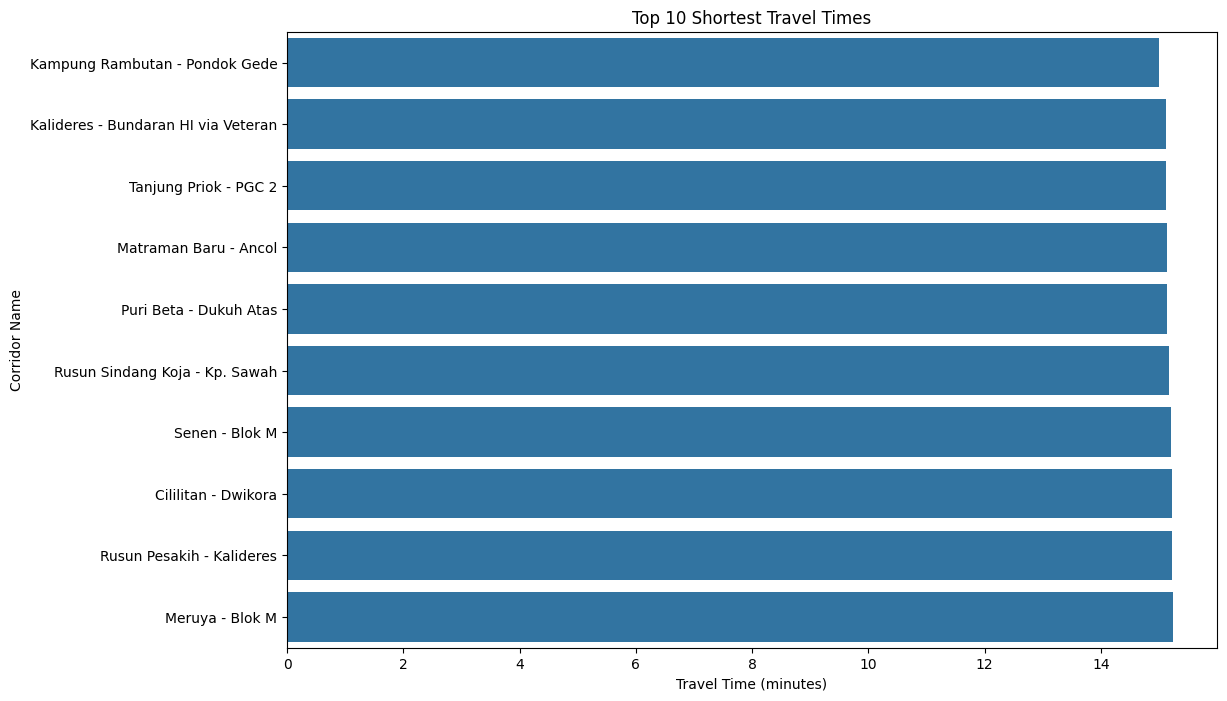

In [94]:
plt.figure(figsize=(12, 8))
sns.barplot(x=shortest_travel_times['travelTime'], y=shortest_travel_times['corridorName'], orient='h')
plt.title('Top 10 Shortest Travel Times')
plt.xlabel('Travel Time (minutes)')
plt.ylabel('Corridor Name')
plt.show()

In [108]:
data_cleaned.to_csv('Transjakarta_cleaned.csv', index=False )

In [105]:
datatrans = data_cleaned.head(10)

In [106]:
datatrans

,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,...,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,travelTime
transID,,,,,,,,,,,,,,,,,,,,,
EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00170,Pal Putih,...,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0,39.150000
LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,P00170,Kemenkes 2,...,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0,57.283333
DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,P00170,Gg. Kunir II,...,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0,51.816667
JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,P00170,Taman Elok 1,...,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0,43.416667
VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00170,Sunter Boulevard Barat,...,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0,39.466667
XTKE052E5E87LN,3587341902618993,dki,Darmanto Rajasa,F,1991,1T,Cibubur - Balai Kota,1.0,P00170,SDN Pondok Labu 11,...,2,2023-04-03 06:44:24,B00899P,Jln. Baros,-6.311046,106.78400,12.0,2023-04-03 07:11:43,0.0,27.316667
ERXO372B2H63RB,3580401035990896,dki,"T. Dadap Pradana, M.Ak",M,2004,1Q,Rempoa - Blok M,0.0,P00170,TPU Bungur,...,15,2023-04-03 05:57:47,B06578P,Blok M Jalur 3,-6.243426,106.80188,24.0,2023-04-03 06:51:12,3500.0,53.416667
CLWK627W2M22WO,5541851157087967,dki,"Oskar Widiastuti, S.Farm",F,1997,5M,Kampung Melayu - Tanah Abang via Cikini,1.0,P00170,Pegangsaan Timur,...,17,2023-04-03 06:32:28,B02387P,Matraman 4,-6.199782,106.85450,23.0,2023-04-03 07:23:54,3500.0,51.433333
OPLW560U3S06UG,3536759468239783,dki,Shakila Maryadi,F,1988,9A,PGC 2 - Grogol 2,1.0,P00170,Slipi Petamburan Arah Selatan,...,4,2023-04-03 06:15:04,P00216,Semanggi,-6.221110,106.81354,6.0,2023-04-03 07:08:31,3500.0,53.450000
